In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import matplotlib.dates as mdates
import cmocean as cm
import pandas as pd
from matplotlib.colors import LogNorm
from IPython.display import HTML
from matplotlib import pyplot as plt, animation

In [3]:
Feb25 = xr.open_dataset('/ocean/cstang/MOAD/analysis-camryn/Ariane_SSC/PortMellon/25feb23_hr0/ariane_trajectories_qualitative.nc')
mesh = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask202108.nc')
sss150_mesh = xr.open_dataset('/ocean/mdunphy/SSS150/grid/mesh_mask_southsalishsea150_update202108210102AUM1.nc')

In [8]:
Feb25

<xarray.Dataset>
Dimensions:       (ntraj: 2000, nb_output: 673)
Dimensions without coordinates: ntraj, nb_output
Data variables: (12/19)
    init_x        (ntraj) float64 ...
    init_y        (ntraj) float64 ...
    init_z        (ntraj) float64 ...
    init_t        (ntraj) float64 ...
    init_age      (ntraj) timedelta64[ns] ...
    init_transp   (ntraj) float64 ...
    ...            ...
    traj_lat      (nb_output, ntraj) float64 ...
    traj_depth    (nb_output, ntraj) float64 ...
    traj_time     (nb_output, ntraj) float64 ...
    traj_temp     (nb_output, ntraj) float32 ...
    traj_salt     (nb_output, ntraj) float32 ...
    traj_dens     (nb_output, ntraj) float32 ...
Attributes: (12/87)
    key_roms:                  .FALSE.
    key_mars:                  .FALSE.
    key_symphonie:             .FALSE.
    key_B2C_grid:              .FALSE.
    key_sequential:            .TRUE.
    key_alltracers:            .TRUE.
    ...                        ...
    ind0_sa:                   1
    indn_sa:                   672
    maxsize_sa:                6
    c_suffix_sa:               _grid_T.nc
    nc_var_sa:                 vosaline
    nc_att_mask_sa:            NONE

### Animation

/tmp/ipykernel_1839714/2709860325.py:52: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=[0, 0, 0.85, 1])  # Leave space for colorbar


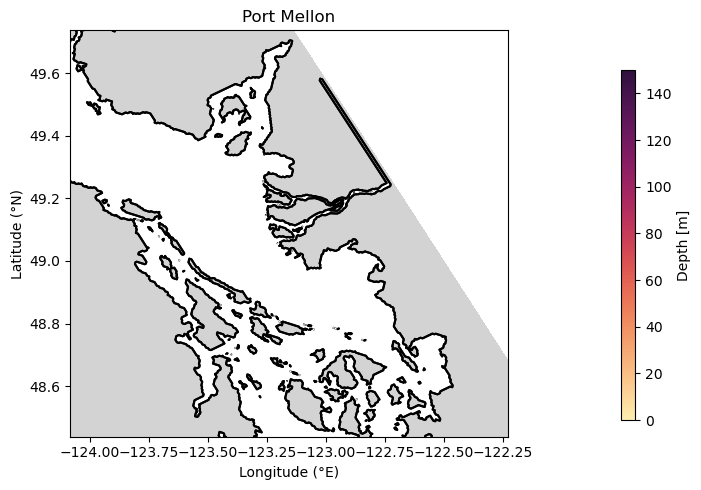

In [4]:
#Building animation
lat_ssc = mesh['nav_lat'].values
lon_ssc = mesh['nav_lon'].values
lat_sss150 = sss150_mesh['nav_lat'].values
lon_sss150 = sss150_mesh['nav_lon'].values

# Make initial animation figure
fig, ax = plt.subplots(figsize=(7, 5))
cax = fig.add_axes([0.9, 0.15, 0.02, 0.7])
# ax.contourf(mesh.nav_lon, mesh.nav_lat, mesh.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='lightgray')
# ax.contour(mesh.nav_lon, mesh.nav_lat, mesh.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='k')
# ax.contourf(ssc_mesh.nav_lon, ssc_mesh.nav_lat, ssc_mesh.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='lightgray')
# ax.contour(ssc_mesh.nav_lon, ssc_mesh.nav_lat, ssc_mesh.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='k')
# Plot sss150 first with white water
ax.contourf(mesh.nav_lon, mesh.nav_lat, mesh.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='lightgray', zorder=2)
ax.contour(mesh.nav_lon, mesh.nav_lat, mesh.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='k', zorder=3)

# Plot ssc with lower zorder and transparency
ax.contourf(mesh.nav_lon, mesh.nav_lat, mesh.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='lightgray', zorder=1)
ax.contour(mesh.nav_lon, mesh.nav_lat, mesh.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='k', zorder=3)

l = ax.scatter([], [], s=20, c=[], vmin=0, vmax=150, edgecolor='k',cmap=cm.cm.matter)
t = ax.text(0.02, 0.02, '', transform=ax.transAxes)
ax.set_xlim([lon_sss150.min()-0.5, lon_sss150.max()])
ax.set_ylim([lat_sss150.min()-0.5, lat_sss150.max()])
ax.set_aspect(1/np.sin(np.deg2rad(49)))
fig.colorbar(l, cax=cax, label='Depth [m]')
# c = ax.contourf(
# mesh.nav_lon, mesh.nav_lat, mesh.mbathy[0,:,:]*10, levels=np.arange(0, 500.1, 5),
# cmap=cm.cm.gray_r, extend='max',zorder=0,
# )
ax.set_xlabel('Longitude (°E)')
ax.set_ylabel('Latitude (°N)')
ax.set_title('Port Mellon')

# Init function
def init():
    t.set_text('')
    l.set_offsets(np.empty((0, 2)))
    l.set_array(np.empty(0))
    return l, t,

# Animate function
def animate(hour):
    l.set_offsets(np.vstack([Feb25.traj_lon[hour,0:30], Feb25.traj_lat[hour,0:30]]).T)
    l.set_array(Feb25.traj_depth[hour,0:30]*-1)
    return l, t,

# Build animation
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=range(len(Feb25.nb_output)-1), interval=100, blit=True)

fig.tight_layout(rect=[0, 0, 0.85, 1])  # Leave space for colorbar

In [5]:
HTML(anim.to_html5_video())